In [1]:
#IMPORTO LIBRERIAS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CURSO IA/Analisis Exploratorio y visualizaciON/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
#estadisticas descriptivas para la columna Electric Range

stats = df[['Electric Range']].describe()
print('Estadisticas')
print(stats)

Estadisticas
       Electric Range
count   205431.000000
mean        52.164342
std         88.075859
min          0.000000
25%          0.000000
50%          0.000000
75%         48.000000
max        337.000000


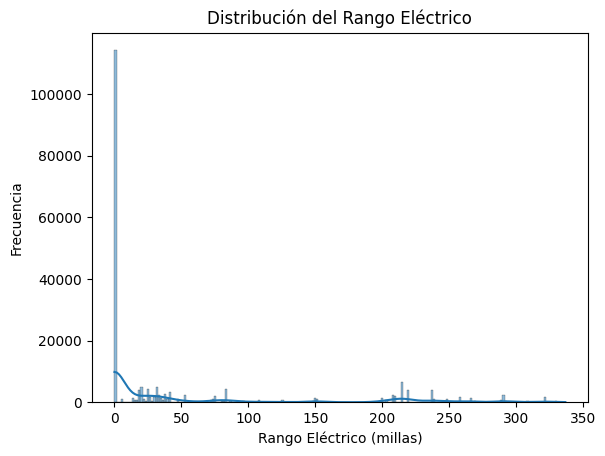

In [5]:
#HISTOGRAMA: gráfico que muestra la frecuencia con la que ocurren ciertos valores en un
#conjunto de datos.
sns.histplot(df['Electric Range'], kde=True)
plt.title('Distribución del Rango Eléctrico')
plt.xlabel('Rango Eléctrico (millas)')
plt.ylabel('Frecuencia')
plt.show()


La Estimación de Densidad de Kernel (KDE) es una forma de representar los mismos datos del histograma, pero en lugar de usar barras, crea una curva suave y continua. Esto te permite ver la forma general de la distribución de los datos sin preocuparte tanto por los intervalos.

In [6]:
df['Electric Range'].isnull().sum()

8

In [7]:
# Manejar valores faltantes
# Opción 1: Eliminar filas con valores NaN en 'Electric Range'
# df = df.dropna(subset=['Electric Range'])

# Opción 2: Rellenar valores NaN con la media de 'Electric Range'
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)

<ipython-input-7-68c4514d67c2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)


In [13]:
# Escalar los datos para el clustering/agrupamiento
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Electric Range']]) #Transforma los valores para que sean más fáciles de comparar.
#misma escala
df_scaled

<class 'sklearn.preprocessing._data.StandardScaler'>


array([[-0.11540693],
       [ 1.12218971],
       [ 2.42791093],
       ...,
       [ 1.67854049],
       [ 1.84885195],
       [-0.59227903]])

StandardScaler es una herramienta que normaliza los datos. Convierte los valores en una escala con media = 0 y desviación estándar = 1. Cuando decimos que StandardScaler "normaliza" los datos con media 0 y desviación estándar 1, estamos diciendo que:

Media 0:queremos que todos los valores estén centrados alrededor de 0.
Por ejemplo, si el promedio del rango eléctrico es 200 millas, StandardScaler ajusta los datos para que 200 se convierta en 0, y otros valores queden más cerca o lejos de ese 0 dependiendo de su diferencia con el promedio.
Desviación estándar 1: La desviación estándar mide cuánto varían los datos respecto a la media.
Después de escalar, la variación entre los valores será ajustada de tal manera que esta dispersión se iguale a 1.

In [9]:
# Crear el modelo de clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características.

<ipython-input-10-7439adc25407>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Electric Range', y='Cluster', data=df, palette='viridis')


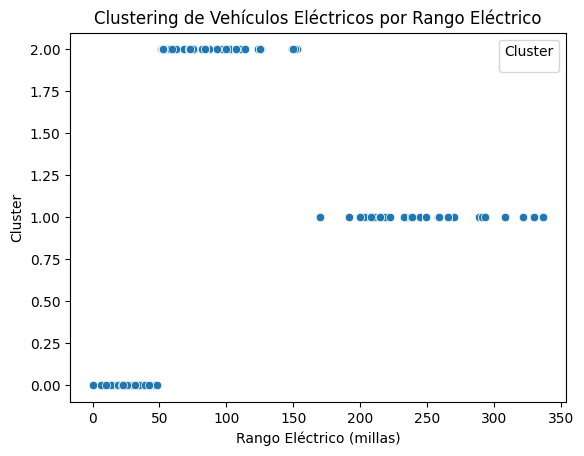

In [10]:
# Visualizar los clusters formados (solo con 'Electric Range')
sns.scatterplot(x='Electric Range', y='Cluster', data=df, palette='viridis')
plt.title('Clustering de Vehículos Eléctricos por Rango Eléctrico')
plt.xlabel('Rango Eléctrico (millas)')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [19]:
# Cargar el conjunto de datos
df =pd.read_csv("/content/drive/MyDrive/CURSO IA/Analisis Exploratorio y visualizaciON/Electric_Vehicle_Population_Data.csv")

In [20]:

# Verificar los nombres de las columnas en el DataFrame
print("Columnas del archivo:", df.columns)

Columnas del archivo: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [28]:
# Seleccionar variables predictoras y la variable de salida
#ajusta el nomre de las col segun lo disponible en el archivo
X = df[['Electric Range']]
y = df['Electric Vehicle Type']  # suponemos q estra es la var de clasificac
X

,Electric Range
0,42.0
1,151.0
2,266.0
3,84.0
4,238.0
...,...
205434,0.0
205435,0.0
205436,200.0
205437,215.0


 X: Son las variables predictoras o características. Estas son las columnas que el modelo usará para hacer predicciones.  
 y: Es la variable objetivo o respuesta, lo que quieres predecir.


In [29]:
y

,Electric Vehicle Type
0,Plug-in Hybrid Electric Vehicle (PHEV)
1,Battery Electric Vehicle (BEV)
2,Battery Electric Vehicle (BEV)
3,Battery Electric Vehicle (BEV)
4,Battery Electric Vehicle (BEV)
...,...
205434,Battery Electric Vehicle (BEV)
205435,Battery Electric Vehicle (BEV)
205436,Battery Electric Vehicle (BEV)
205437,Battery Electric Vehicle (BEV)


In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
#entrenar modeo de bosquye aleatorio
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Realizar predicciones y evaluar la exactitud
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.9998701973001038


In [44]:
print("Reporte de clasificacion: ", classification_report(y_test, y_pred))
#

Reporte de clasificacion:                                          precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00     48480
Plug-in Hybrid Electric Vehicle (PHEV)       1.00      1.00      1.00     13152

                              accuracy                           1.00     61632
                             macro avg       1.00      1.00      1.00     61632
                          weighted avg       1.00      1.00      1.00     61632

